<center>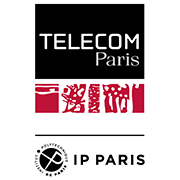</center>

<h1><center><strong><font color="green">IA 717: 


</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> <a>Maria Boritchev</a></h3>
<email>maria.boritchev@telecom-paris.fr</email>
<br/>

Year 2025-2026
</center>

------------------------

# <font color="green">**Context and objectives**</font>

> The recent years have seen a surge of initiatives with the goal of defining what “ethical” artificial intelligence would or should entail, resulting in the publication of various charters and manifestos discussing AI ethics; these documents originate from academia, AI industry companies, non-profits, regulatory institutions, and the civil society. The contents of such documents vary wildly, from short, vague position statements to verbatims of democratic debates or impact assessment studies. As such, they are a marker of the social world of artificial intelligence, outlining the tenets of different actors, the consensus and dissensus on important goals, and so on. <a href="https://mapaie.telecom-paris.fr/mapaie-paper.pdf">Mapping AI Ethics: a meso-scale analysis of its charters and manifestos, M. Gornet et al, 2024.</a>

The objective of this project to study the linguistic specificities of a corpus of charters and manifestos of AI ethics, called ```MapAIE```. We will study the semantic structure of sentences from MapAIE using the Abstract Meaning Representation (<a href="https://github.com/amrisi/amr-guidelines/blob/master/amr.md">AMR</a>) abstraction method. In particular, we will focus on the usage and the environment of the term _fairness_, in order to see its context and the (possibly different?) meanings associated with its usage.

This project is organised in three subtasks:
1) Data retrieval and exploration.
2) Exploration of the term _fairness_ in the data.
3) AMR graphs exploration & exploration of the term _fairness_ in AMR graphs.


### <font color="green">Evaluation</font>

The project is evaluated through a presentation with a report and your completed project, documented with a README. Grades will be partly individual and partly collective. 

# <font color="green">**1 - Data Presentation and Retrieval**</font>

Our main corpus is called _MapAIE - Mapping AI Ethics_. It is a collection of 436 common charters and manifestos around artificial intelligence and AI ethics. The corpus' <a href="https://mapaie.telecom-paris.fr/mapaie-datasheet.pdf">datasheet</a> provides detailed information about the collection process and the contents of the corpus. 

<font color="red">1.1 Question:</font> Using the git repository https://gitlab.telecom-paris.fr/tiphaine.viard/mapaie, build the data locally. How many documents are there in the ```./pdf``` folder? in the ```./txt``` folder?

In [1]:
import os

docs_path = "docs"
txts_path = "txts"

pdf_count = len([f for f in os.listdir(docs_path) if f.lower().endswith(".pdf")])
html_count = len([f for f in os.listdir(docs_path) if f.lower().endswith(".html")])
txt_count = len([f for f in os.listdir(txts_path) if f.lower().endswith(".txt")])

print("Nombre de PDF   :", pdf_count)
print("Nombre de HTML  :", html_count)
print("Nombre de TXT   :", txt_count)


Nombre de PDF   : 417
Nombre de HTML  : 383
Nombre de TXT   : 650


<font color="yellow">1.1 Answer:</font>

If the answer in the previous question is different from 436, reduce the local data by keeping only the documents that should be included in the corpus. These documents are identified in the file `all_manifestos.csv`, these are the documents which state `Included`in the column `Status`. 

Let's explore the data. As you can see, documents in ```./pdf``` folder and documents in the ```./txt``` folder are the same, and the name formatting is such that ```n.txt``` contains plain text extracted from ```n.pdf```.

<font color="red">1.2 Question:</font> Why is it useful to have the data both in .pdf and .txt format? Cite one advantage and one drawback for linguistic analysis for each of the formats.

<font color="orange">1.2 Answer:</font> 

We now want to know more about words and key-words used throughout the corpus. There are several terms that are widely used when writing about ethics of AI, and it is interesting from a linguistic point of view to see where and how these words occur. 

<font color="red">1.3 Question:</font> what are the most frequent words, excluding stopwords, in the whole corpus? Please provide visualizations and comment these visualisations.

In [2]:
# chargement des fichiers pour analyse
import os

def load_texts_from_folder(folder_path):
    texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8", errors="ignore") as f:
                texts.append(f.read())
    return texts

corpus_docs = load_texts_from_folder("docs")
corpus_txts = load_texts_from_folder("txts")

corpus = corpus_docs + corpus_txts

print(f"✅ Corpus chargé : {len(corpus)} documents trouvés ({len(corpus_docs)} dans docs/, {len(corpus_txts)} dans txts/)")
print(f"Exemple de texte :\n---\n{corpus[0][:500]}...")


✅ Corpus chargé : 650 documents trouvés (0 dans docs/, 650 dans txts/)
Exemple de texte :
---
A Unified Framework of Five Principles for AI in Society · Issue 1.1, Summer 2019Skip to main contentSearchDashboardcaret-downLoginLogin or SignupHomeIssuescaret-downSectionscaret-downColumnscaret-downCollectionscaret-downPodcastSubmitcaret-downAboutcaret-downMastheadcaret-downIssue 1.1, Summer 2019Issue 1.1, Summer 2019Milestones and MillstonesAI and Responsible Data SciencePublished on Jul 01, 2019DOI10.1162/99608f92.8cd550d1A Unified Framework of Five Principles for AI in Societyby Luciano Fl...


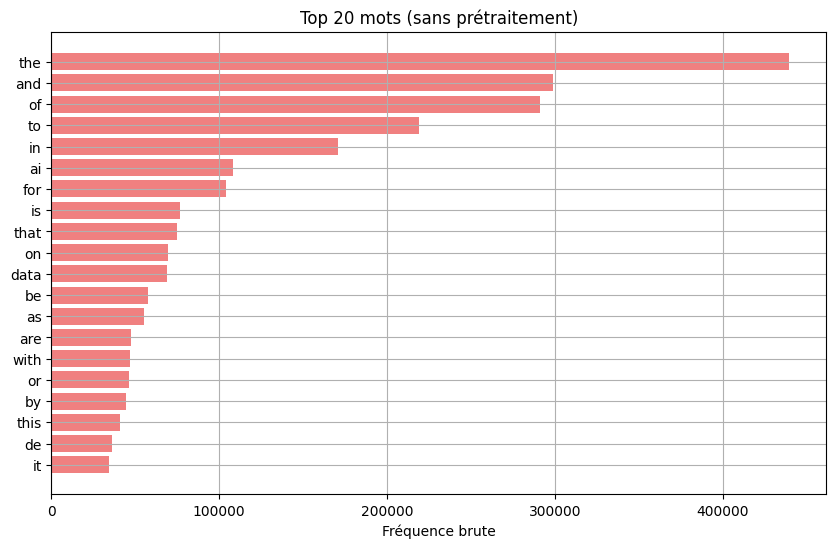

,word,frequency
165706,the,439783
26043,and,298643
122706,of,291384
169123,to,218963
92255,in,170883


In [3]:
# sans preprocess
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vectorizer_raw = CountVectorizer()
X_raw = vectorizer_raw.fit_transform(corpus)

word_freq_raw = np.asarray(X_raw.sum(axis=0)).ravel()
words_raw = vectorizer_raw.get_feature_names_out()

df_raw = pd.DataFrame({'word': words_raw, 'frequency': word_freq_raw})
df_raw = df_raw.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(df_raw['word'][::-1], df_raw['frequency'][::-1], color='lightcoral')
plt.title("Top 20 mots (sans prétraitement)")
plt.xlabel("Fréquence brute")
plt.grid(True)
plt.show()

df_raw.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fanch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


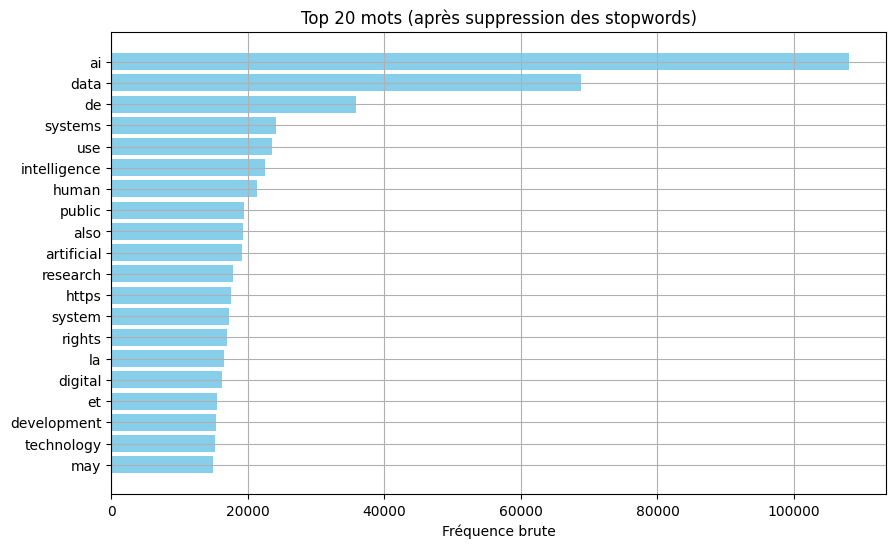

,word,frequency
22253,ai,108122
52489,data,68748
53664,de,35864
161899,systems,24119
176252,use,23516


In [4]:
# suppression de stopwords avec nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = stopwords.words('english')

vectorizer_stop = CountVectorizer(stop_words=stop_words)
X_stop = vectorizer_stop.fit_transform(corpus)

word_freq_stop = np.asarray(X_stop.sum(axis=0)).ravel()
words_stop = vectorizer_stop.get_feature_names_out()

df_stop = pd.DataFrame({'word': words_stop, 'frequency': word_freq_stop})
df_stop = df_stop.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(df_stop['word'][::-1], df_stop['frequency'][::-1], color='skyblue')
plt.title("Top 20 mots (après suppression des stopwords)")
plt.xlabel("Fréquence brute")
plt.grid(True)
plt.show()

df_stop.head()


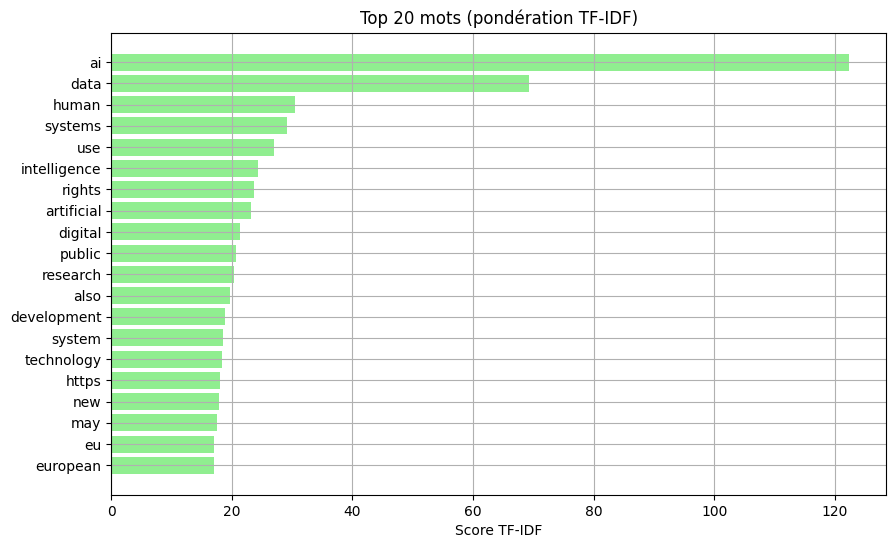

,word,score
22253,ai,122.444504
52489,data,69.352466
89254,human,30.487062
161899,systems,29.081928
176252,use,26.939850


In [5]:
# utilisation du tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words=stop_words)
X_tfidf = vectorizer_tfidf.fit_transform(corpus)

word_scores = np.asarray(X_tfidf.sum(axis=0)).ravel()
words_tfidf = vectorizer_tfidf.get_feature_names_out()

df_tfidf = pd.DataFrame({'word': words_tfidf, 'score': word_scores})
df_tfidf = df_tfidf.sort_values(by='score', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(df_tfidf['word'][::-1], df_tfidf['score'][::-1], color='lightgreen')
plt.title("Top 20 mots (pondération TF-IDF)")
plt.xlabel("Score TF-IDF")
plt.grid(True)
plt.show()

df_tfidf.head()


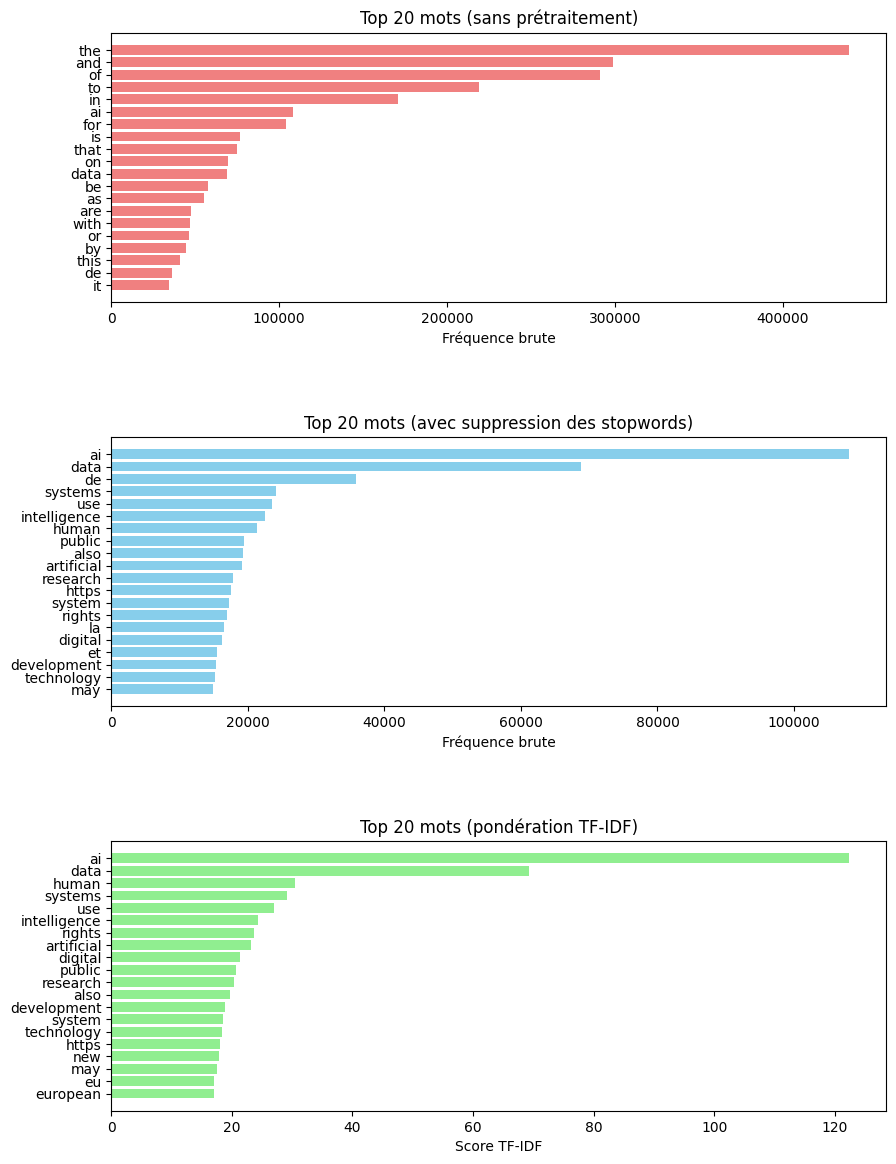

In [6]:
# Comparaison des 3
fig, axes = plt.subplots(3, 1, figsize=(10, 14))
plt.subplots_adjust(hspace=0.5)

#sans preprocess
axes[0].barh(df_raw['word'][::-1], df_raw['frequency'][::-1], color='lightcoral')
axes[0].set_title("Top 20 mots (sans prétraitement)")
axes[0].set_xlabel("Fréquence brute")

# avec stopwords
axes[1].barh(df_stop['word'][::-1], df_stop['frequency'][::-1], color='skyblue')
axes[1].set_title("Top 20 mots (avec suppression des stopwords)")
axes[1].set_xlabel("Fréquence brute")

# TF-IDF
axes[2].barh(df_tfidf['word'][::-1], df_tfidf['score'][::-1], color='lightgreen')
axes[2].set_title("Top 20 mots (pondération TF-IDF)")
axes[2].set_xlabel("Score TF-IDF")

plt.show()


L’objectif de cette section était d’identifier les mots les plus fréquents du corpus à partir des documents contenus dans les dossiers docs/ et txts/, selon trois approches :

Analyse brute (sans prétraitement),

Analyse avec suppression des stopwords,

Analyse pondérée via TF-IDF.

## 1. Sans prétraitement

La première méthode, appliquée directement sur le texte brut, montre une forte domination des mots très courants de la langue anglaise tels que the, and, of, to, in, is ou for.
Ces termes sont appelés stopwords et n’apportent aucune information sémantique spécifique : ils servent principalement à structurer la phrase (articles, prépositions, conjonctions etc.).

Ainsi, les fréquences élevées observées ici ne reflètent aucune tendance thématique du corpus, mais seulement la distribution naturelle de la langue. 
Cette première analyse met cependant en évidence la nécessité d’un prétraitement linguistique pour isoler les informations pertinentes.

## 2. Avec suppression des stopwords

Après suppression des stopwords à l’aide du module nltk, les résultats deviennent immédiatement plus informatifs.
Les mots dominants tels que ai, data, systems, intelligence, human, research, technology ou development traduisent clairement la thématique du corpus, centrée sur l’intelligence artificielle, la technologie et leurs impacts sociétaux.

On observe également quelques termes issus de langues différentes (de, la, et), indiquant que certains documents sont multilingues —> une observation utile pour d’éventuels prétraitements linguistiques plus fins.

Cette approche fournit une représentation lexicale cohérente et déjà exploitable pour une analyse de contenu ou un modèle de classification.

## 3. Pondération TF-IDF

La troisième méthode repose sur la pondération TF-IDF (Term Frequency – Inverse Document Frequency), qui valorise les mots fréquents dans un document mais rares dans l’ensemble du corpus.

Les termes mis en avant (ai, data, human, systems, intelligence, artificial, rights, digital)confirment les tendances observées précédemment, tout en réduisant l’impact des mots récurrents mais peu discriminants.

Le TF-IDF permet donc une lecture plus fine : il ne mesure plus la fréquence absolue, mais l’importance contextuelle des mots, révélant ceux qui caractérisent le mieux chaque texte du corpus. 
Cette méthode est particulièrement adaptée pour la modélisation thématique ou la classification automatique.

## Conclusion

La comparaison des trois approches montre que le prétraitement linguistique est indispensable pour dégager le sens réel d’un corpus.

Sans nettoyage, l’analyse est dominée par des mots fonctionnels ; avec stopwords, elle révèle les thématiques majeures ; enfin, la pondération TF-IDF affine encore la pertinence en hiérarchisant les termes caractéristiques.

Cette progression illustre concrètement la valeur ajoutée des techniques de traitement automatique du langage pour toute analyse textuelle de haut niveau.

## Pour aller plus loin 
 
- Lemmatisation + stemming 
- Nuages de mots pondérés 

La lemmatisation et le stemming sont deux techniques fondamentales de prétraitement en analyse de texte.
Elles visent à réduire les mots à leur forme canonique ou racine commune, afin de regrouper les variantes morphologiques d’un même concept.

Lemmatisation : remplace un mot par sa lemme, c’est-à-dire sa forme de dictionnaire (ex. “studies” → “study”, “better” → “good”).

Stemming : coupe les suffixes pour réduire les mots à une racine (“technological”, “technologies” → “technolog”).

Le but est de réduire la redondance lexicale et de mieux capter la signification thématique globale du corpus, tout en diminuant la dimensionnalité du vocabulaire.

In [7]:
# Lemmatisation + stemming (regrouper les mots proches comme technology/technological/technolog etc.)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    return ' '.join(tokens)

corpus_lemmatized = [preprocess_text(doc) for doc in corpus]

print("✅ Lemmatisation + stemming effectués sur tout le corpus.")
print("Exemple (avant/après) :")
print("\nAVANT:", corpus[0][:300])
print("\nAPRÈS:", corpus_lemmatized[0][:300])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fanch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fanch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fanch\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fanch\AppData\Roaming\nltk_data...


✅ Lemmatisation + stemming effectués sur tout le corpus.
Exemple (avant/après) :

AVANT: A Unified Framework of Five Principles for AI in Society · Issue 1.1, Summer 2019Skip to main contentSearchDashboardcaret-downLoginLogin or SignupHomeIssuescaret-downSectionscaret-downColumnscaret-downCollectionscaret-downPodcastSubmitcaret-downAboutcaret-downMastheadcaret-downIssue 1.1, Summer 2019

APRÈS: unifi framework five principl societi issu summer skip main contentsearchdashboardcaretdownloginlogin signuphomeissuescaretdownsectionscaretdowncolumnscaretdowncollectionscaretdownpodcastsubmitcaretdownaboutcaretdownmastheadcaretdownissu summer issu summer mileston millstonesai respons data sciencep


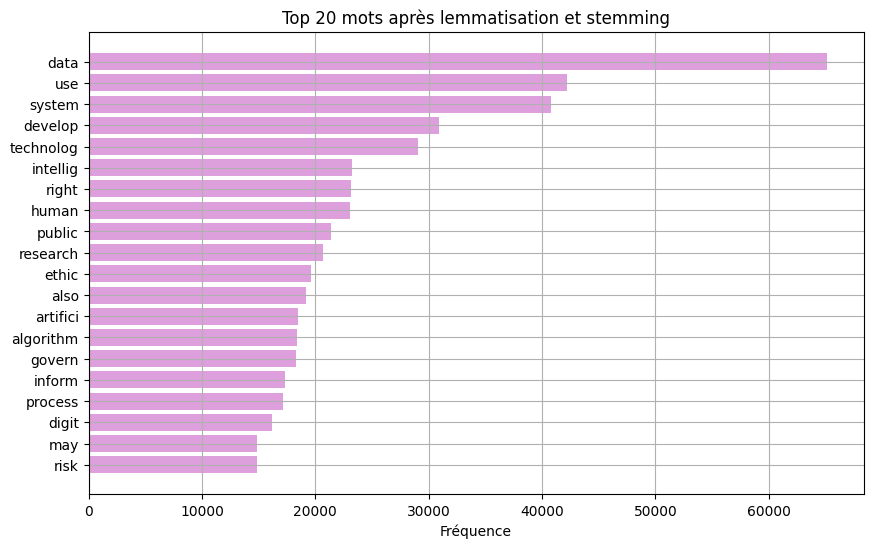

,word,frequency
29620,data,65115
152437,use,42189
138999,system,40818
33511,develop,30956
140721,technolog,29023
77211,intellig,23253
124685,right,23118
71606,human,23023
118405,public,21424
123480,research,20684


In [8]:
# Analyse de mots apres lemmatisation et stemmings
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vectorizer_lemma = CountVectorizer()
X_lemma = vectorizer_lemma.fit_transform(corpus_lemmatized)

word_freq_lemma = np.asarray(X_lemma.sum(axis=0)).ravel()
words_lemma = vectorizer_lemma.get_feature_names_out()

df_lemma = pd.DataFrame({'word': words_lemma, 'frequency': word_freq_lemma})
df_lemma = df_lemma.sort_values(by='frequency', ascending=False).head(20)

# Affichage
plt.figure(figsize=(10,6))
plt.barh(df_lemma['word'][::-1], df_lemma['frequency'][::-1], color='plum')
plt.title("Top 20 mots après lemmatisation et stemming")
plt.xlabel("Fréquence")
plt.grid(True)
plt.show()

display(df_lemma.head(10))


## Analyse du graphique 

On constate que :

Les formes fléchies et dérivées ont bien été regroupées : “technology”, “technologies”, “technological” → “technolog”

“develop”, “development”, “developing” → “develop”

“intelligence”, “intelligent” → “intellig”

Les mots dominants — data, use, system, develop, technology, intellig, human, ethic, algorithm — traduisent une cohérence sémantique forte:
le corpus aborde des thèmes récurrents liés à l’intelligence artificielle, l’éthique, la technologie, les droits humains, et la gouvernance.

Les mots parasites ou non informatifs (the, and, of, etc.) ont totalement disparu grâce à la suppression des stopwords effectuée en amont.

Ainsi, la représentation devient plus concentrée et plus discriminante, facilitant l’analyse thématique ou la modélisation statistique.

## Limite

Le stemming peut parfois “trop couper” les mots (“responsibility” → “respons”), ce qui dégrade la lisibilité humaine, même si les modèles statistiques y gagnent.

La lemmatisation, plus précise linguistiquement, est parfois limitée par la qualité des dictionnaires sous-jacents (notamment sur les textes techniques ou multilingues).

# Conclusion

L’intégration de la lemmatisation et du stemming dans le pipeline de traitement textuel a permis de rationaliser le vocabulaire et de clarifier les thématiques centrales du corpus.

Les résultats confirment la prédominance de concepts liés à la donnée, à l’intelligence artificielle, et à l’éthique numérique.


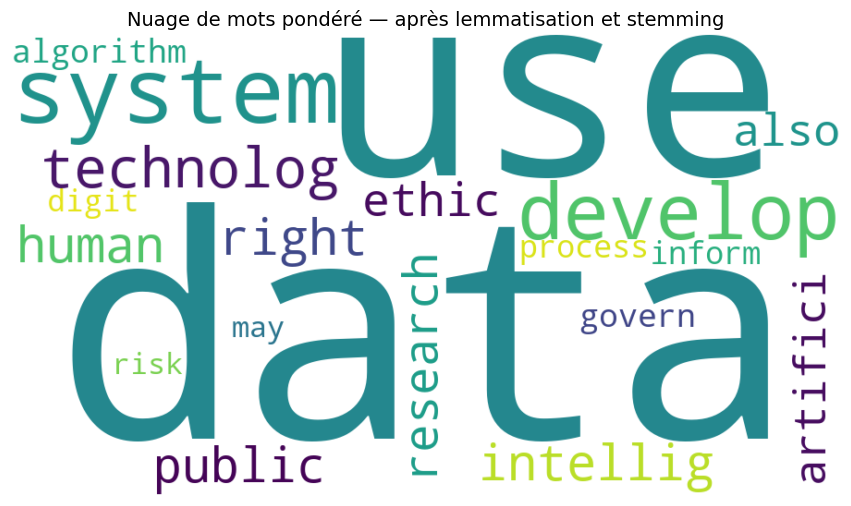

In [9]:
# Nuage de mots pondérés
from wordcloud import WordCloud

# dico de fréquence
word_freq_dict = dict(zip(df_lemma['word'], df_lemma['frequency']))

# génération du nuage
wc = WordCloud(
    width=900,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots pondéré — après lemmatisation et stemming", fontsize=14)
plt.show()


<font color="orange">1.3 Answer:</font> 

A FAIRE : COMPARER RESULTATS AVEC TF IDF , SANS STOPWORD , SANS PREPROCESS

# <font color="green">**2 - Exploration of the term _fairness_ in the data**</font>


<font color="red">2.1 Question:</font> Draw a visualisation of the amount of times the term _fairness_ is used in a document compared with the total amount of words in a document. Comment this viualisation: what can we observe? What hypothesis can we draw from this observation?

In [ ]:
# To-do

<font color="orange">2.1 Answer:</font> 

<font color="red">2.2 Question:</font> which are the documents in which the term _fairness_ appears the most (top 10% of the corpus)? Please provide a visualization and comment it.

In [ ]:
# To-do

<font color="orange">2.2 Answer:</font> 

Now, we want to know more about the context in which the term _fairness_ appears in the corpus. 

<font color="red">2.3 Question:</font> Explore the context in which the term _fairness_ appears in the documents selected in the previous question (top 10% of the corpus). Please provide a visualisation and comment it.

Hint: you could for example consider n-grams containing _fairness_ (but feel free to explore context by other means!)

In [ ]:
# To-do

<font color="orange">2.3 Answer:</font> 

We will now focus on a sentence-level analysis of our corpus and extract a sub-corpus of sentences that use the word _fairness_.

<font color="red">2.4 Question:</font> What information will we lose by focusing on extracted sentences? Please provide three answers.

<font color="orange">2.4 Answer:</font> 

We will definitely loose information, but focusing on a sentence-level analysis gives us access to finer-grained means of linguistic analysis. 

<font color="red">2.5 Question:</font> Extract the _fairness-MapAIE_ corpus: a corpus of sentences of MapAIE containing the term _fairness_. Organise the data in such a way that, for each sentence, we have:
- the textual content of the sentence;
- the identifier (number) of the document this sentence is extracted from.
How many sentences does the _fairness-MapAIE_ corpus contain?

In [ ]:
import re
from pathlib import Path
import pandas as pd

txt_root = Path("txts")              
pattern = re.compile(r"\bfairness\b", re.IGNORECASE)
splitter = re.compile(r"(?<=[.!?])\s+(?=[A-Z0-9])")

files = sorted(txt_root.glob("*.txt"), key=lambda p: int(p.stem))

records = []
for path in files:
    text = path.read_text(encoding="utf-8", errors="ignore")
    text = re.sub(r"\s+", " ", text.strip())
    if not text:
        continue
    sentences = splitter.split(text) or text.split(". ")
    for sentence in sentences:
        sentence = sentence.strip()
        if pattern.search(sentence):
            records.append({"doc_id": int(path.stem), "sentence": sentence})

fairness_df = pd.DataFrame(records)


In [19]:
print(fairness_df[['doc_id', 'sentence']])

print(fairness_df.shape[0])

fairness_df.to_csv("fairness_mapaie.csv", index=False)

      doc_id                                           sentence
0          0  In the ensuing discussion, we note the limitat...
1          0  It also warns against the risk of bias in data...
2         12  24 https://en.oxforddictionaries.com/definitio...
3         12  28 This is broadly known at the FATML communit...
4         12  Considering ethical concepts such as justice, ...
...      ...                                                ...
2996     728  Algorithms and Economic Justice | Rebecca Kell...
2997     728  The principles of transparency, fairness, and ...
2998     728  One of these key principles is “Fairness and N...
2999     728  Algorithms and Economic Justice | Rebecca Kell...
3000     728  While several legislative proposals specifical...

[3001 rows x 2 columns]
3001


In [21]:
import re
from pathlib import Path
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt", quiet=True)  

txt_root = Path("txts")
pattern = re.compile(r"\bfairness\b", re.IGNORECASE)

records = []
for path in sorted(txt_root.glob("*.txt"), key=lambda p: int(p.stem)):
    text = path.read_text(encoding="utf-8", errors="ignore").strip()
    if not text:
        continue
    cleaned = re.sub(r"\s+", " ", text)
    sentences = sent_tokenize(cleaned) or [cleaned]  
    for sentence in sentences:
        sentence = sentence.strip()
        if pattern.search(sentence):
            records.append({"doc_id": int(path.stem), "sentence": sentence})

fairness_df = pd.DataFrame(records)
fairness_df.head()       
fairness_df.shape[0]
fairness_df.to_csv("fairness_mapaie_nltk.csv", index=False)


<font color="orange">2.5 Answer:</font> 

2 facons de créer le csv : soit a la main en stripant avec des regex , soit en utilisant nltk. Pour la suite 

Parler du probleme qu'on a eu avec le csv qu'on a envoyé pour avoir le AMR. ( Certaine slignes du csv contenaient plusieurs phrases , dont certaines ne contenant pas le mot fairness). 


## <font color="red">/!\ To do to get data for the rest of the project /!\ </font> 

### Make sure fairness-MapAIE is properly extracted and available in the project's git repository. Then, send an email to maria.boritchev@telecom-paris.fr to inform me of the availability of fairness-MapAIE so that I can produce data you need for part 3.

We continue by investigating the syntax of sentences. The baseline approach we will use for this part is part-of-speech (POS) tagging: by tagging the elements of sentences by POS, we can investigate the main syntactic roles taken by the term _fairness_.

<font color="red">2.6 Question:</font> What are the syntactic roles taken by the term _fairness_ in the _fairness-MapAIE_ corpus? Please provide a visualization and comment it.

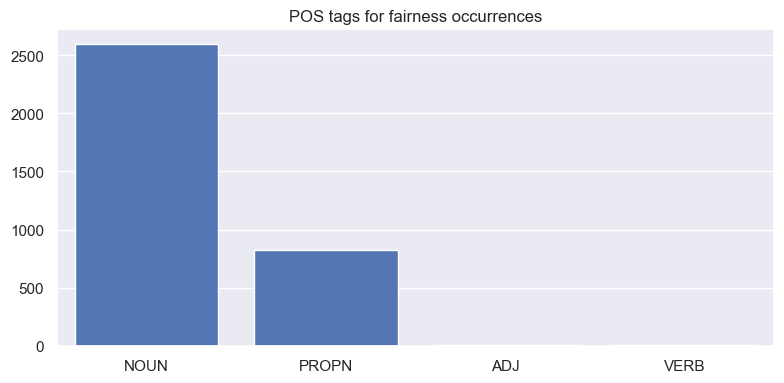

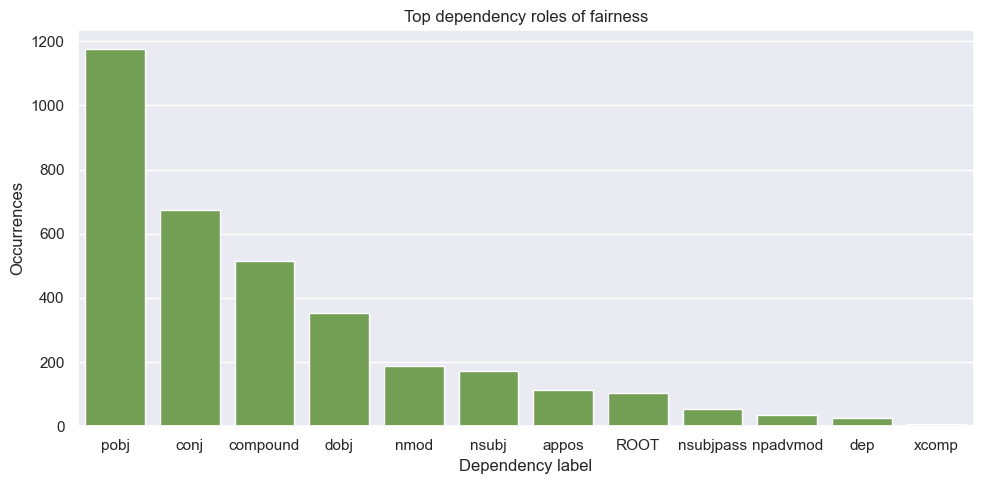

In [26]:
import pandas as pd
!pip install spacy
!pip install seaborn
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set_theme()
df = pd.read_csv("fairness_mapaie_nltk.csv")

nlp = spacy.load("en_core_web_sm", disable=["ner"]) 

pos_counter, dep_counter = Counter(), Counter()
for doc in nlp.pipe(df["sentence"].tolist(), batch_size=64):
    for tok in doc:
        if tok.lemma_.lower() == "fairness":
            pos_counter[tok.pos_] += 1
            dep_counter[tok.dep_] += 1

pos_df = pos_counter.most_common()
dep_df = dep_counter.most_common()

pd.DataFrame(pos_df, columns=["POS", "count"]).to_csv("fairness_pos_counts.csv", index=False)
pd.DataFrame(dep_df, columns=["dep", "count"]).to_csv("fairness_dep_counts.csv", index=False)

plt.figure(figsize=(8,4))
sns.barplot(x=[p for p,_ in pos_df], y=[c for _,c in pos_df], color="#4472c4")
plt.title("POS tags for fairness occurrences")
plt.tight_layout()
plt.savefig("fairness_pos_roles.png")

plt.figure(figsize=(10,5))
sns.barplot(x=[d for d,_ in dep_df[:12]], y=[c for _,c in dep_df[:12]], color="#70ad47")
plt.title("Top dependency roles of fairness")
plt.xlabel("Dependency label")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig("fairness_dependency_roles.png")


<font color="orange">2.6 Answer:</font> 

# <font color="green">**3 - AMR graphs exploration**</font>


We now investigate the semantics of sentences using Abstract Meaning Representation. Abstract Meaning Representation (AMR, <a href="https://aclanthology.org/W13-2322.pdf">Banarescu et al, 2013</a>)  provides a framework to model the meaning of a sentence, notably actions, events or states and their participants. AMR relies heavily on (verbal) concepts defined in <a href="https://propbank.github.io/">PropBank</a> . The figure below shows an AMR representation for the sentence "Barack Obama was born in 1961". In this figure, ```bear-02``` stands for PropBank's second sense for the verb ''to bear''. Instances are indicated by a following ```/```, for example  ```p``` is an instance of the concept  ```person ```. The names of the variables do not have any particular meaning, they have to be distinct. Relations are indicated by an initial colon (ex:  ```:ARG1```,  ```:time```). Literals (strings and numbers) lack a preceding instance and  ```/``` (ex:  ``` ``Obama'' ``` and  ```1961```. More info on AMR syntax can be found here: https://github.com/amrisi/amr-guidelines/blob/master/amr.md
.

<center>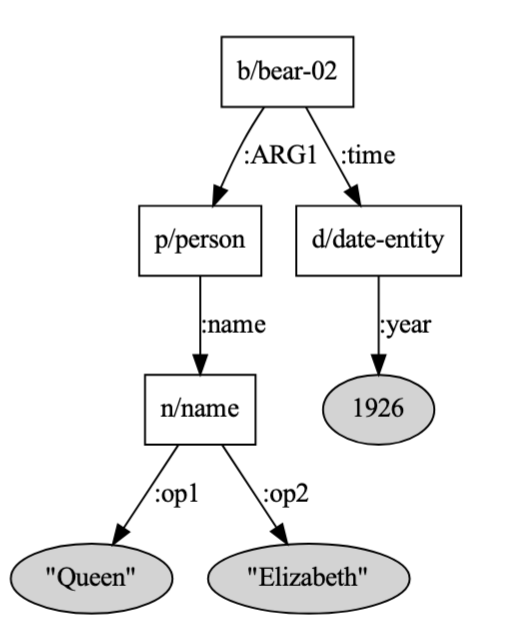</center>

The same graph can be represented in a serialised format called PENMAN format: 
```
(b / bear-02
    :ARG1 (p / person
        :name (n / name
            :op1 "Queen"
            :op2 "Elizabeth"))
    :time (d / date-entity
        :year 1926))
```

AMR graphs for fairness-MapAIE are provided in the file `fairness-MapAIE_penmans.amr`. It is text file containing, for each sentence:
- a line `::snt`, providing the original sentence in English;
- a line with the file number;
- the AMR graph in PENMAN format.

<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _fairness_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

In [ ]:
# To-do

<font color="orange">3.1 Answer:</font> 

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _fairness_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _fairness_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _fairness_;
- the siblings (concepts with the same parent) of the term _fairness_;
- the children (inferior concepts) of the term _fairness_;
- the relationships linking _fairness_ to its parents and its children.

<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

In [ ]:
# To-do

<font color="orange">3.2 Answer:</font> 